In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('../input/fetal-health-classification/train.csv')

In [3]:
data.head()

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,ID,fetal_health
0,-0.000765,0.021821,0.000044,0.003379,0.001619,0.000435,22,0.245151,67,6.567142,109,90,145,4,4,145,126,138,65,-1,0,1
1,0.007515,0.001571,0.000050,0.001173,0.002565,-0.000735,50,0.366428,29,4.978952,44,63,144,5,2,133,149,155,83,0,1,1
2,-0.000048,0.004582,0.001474,-0.000664,-0.000259,-0.000638,17,1.483585,56,7.400922,78,139,164,8,1,138,111,178,4,1,2,2
3,-0.002214,0.065914,0.000847,0.003798,0.001583,-0.002050,79,3.885219,48,8.811157,140,138,155,13,1,151,136,160,91,1,3,1
4,-0.001002,0.003304,0.001206,-0.000781,0.000173,-0.001451,45,1.286181,5,3.723444,5,91,165,13,0,132,152,132,27,1,4,1


In [4]:
data.head(-100)

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,ID,fetal_health
0,-0.000765,0.021821,0.000044,0.003379,0.001619,0.000435,22,0.245151,67,6.567142,109,90,145,4,4,145,126,138,65,-1,0,1
1,0.007515,0.001571,0.000050,0.001173,0.002565,-0.000735,50,0.366428,29,4.978952,44,63,144,5,2,133,149,155,83,0,1,1
2,-0.000048,0.004582,0.001474,-0.000664,-0.000259,-0.000638,17,1.483585,56,7.400922,78,139,164,8,1,138,111,178,4,1,2,2
3,-0.002214,0.065914,0.000847,0.003798,0.001583,-0.002050,79,3.885219,48,8.811157,140,138,155,13,1,151,136,160,91,1,3,1
4,-0.001002,0.003304,0.001206,-0.000781,0.000173,-0.001451,45,1.286181,5,3.723444,5,91,165,13,0,132,152,132,27,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0.009333,0.470420,0.000937,-0.000072,0.000717,0.000274,37,0.918656,61,4.822512,23,53,195,5,1,130,138,127,129,-1,1295,3
1296,-0.001543,0.004371,0.002494,-0.000540,0.000584,0.000170,55,0.328907,30,4.388942,64,128,150,10,4,160,151,125,49,0,1296,2
1297,-0.001737,0.005674,0.001591,0.005412,0.001442,-0.001538,81,0.277304,41,2.527615,89,92,154,2,7,180,90,177,115,1,1297,1
1298,-0.001306,0.003199,0.001105,0.000777,0.000301,-0.000497,63,0.048654,11,14.422310,56,127,198,6,4,141,121,142,134,1,1298,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   accelerations                                           1400 non-null   float64
 1   fetal_movement                                          1400 non-null   float64
 2   uterine_contractions                                    1400 non-null   float64
 3   light_decelerations                                     1400 non-null   float64
 4   severe_decelerations                                    1400 non-null   float64
 5   prolongued_decelerations                                1400 non-null   float64
 6   abnormal_short_term_variability                         1400 non-null   int64  
 7   mean_value_of_short_term_variability                    1400 non-null   float64
 8   percentage_of_time_with_abnormal_long_

In [6]:
eda_df = data.copy()

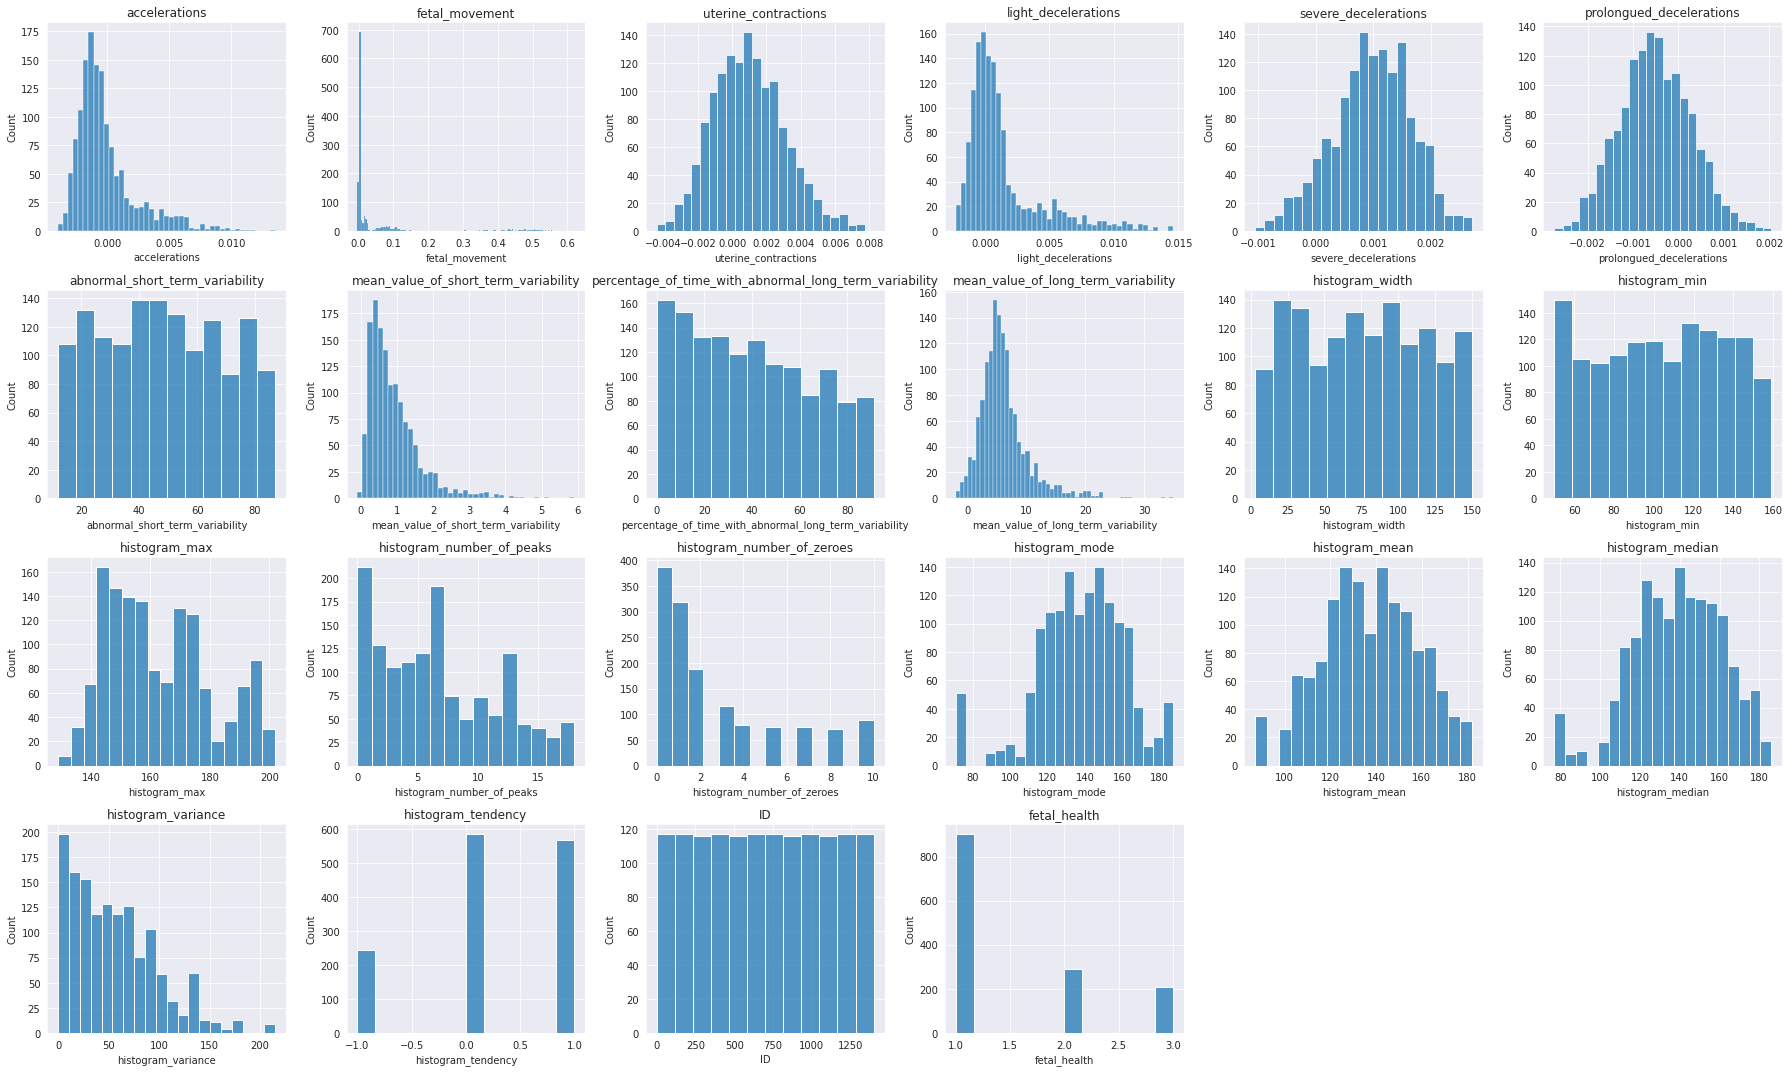

In [7]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=eda_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

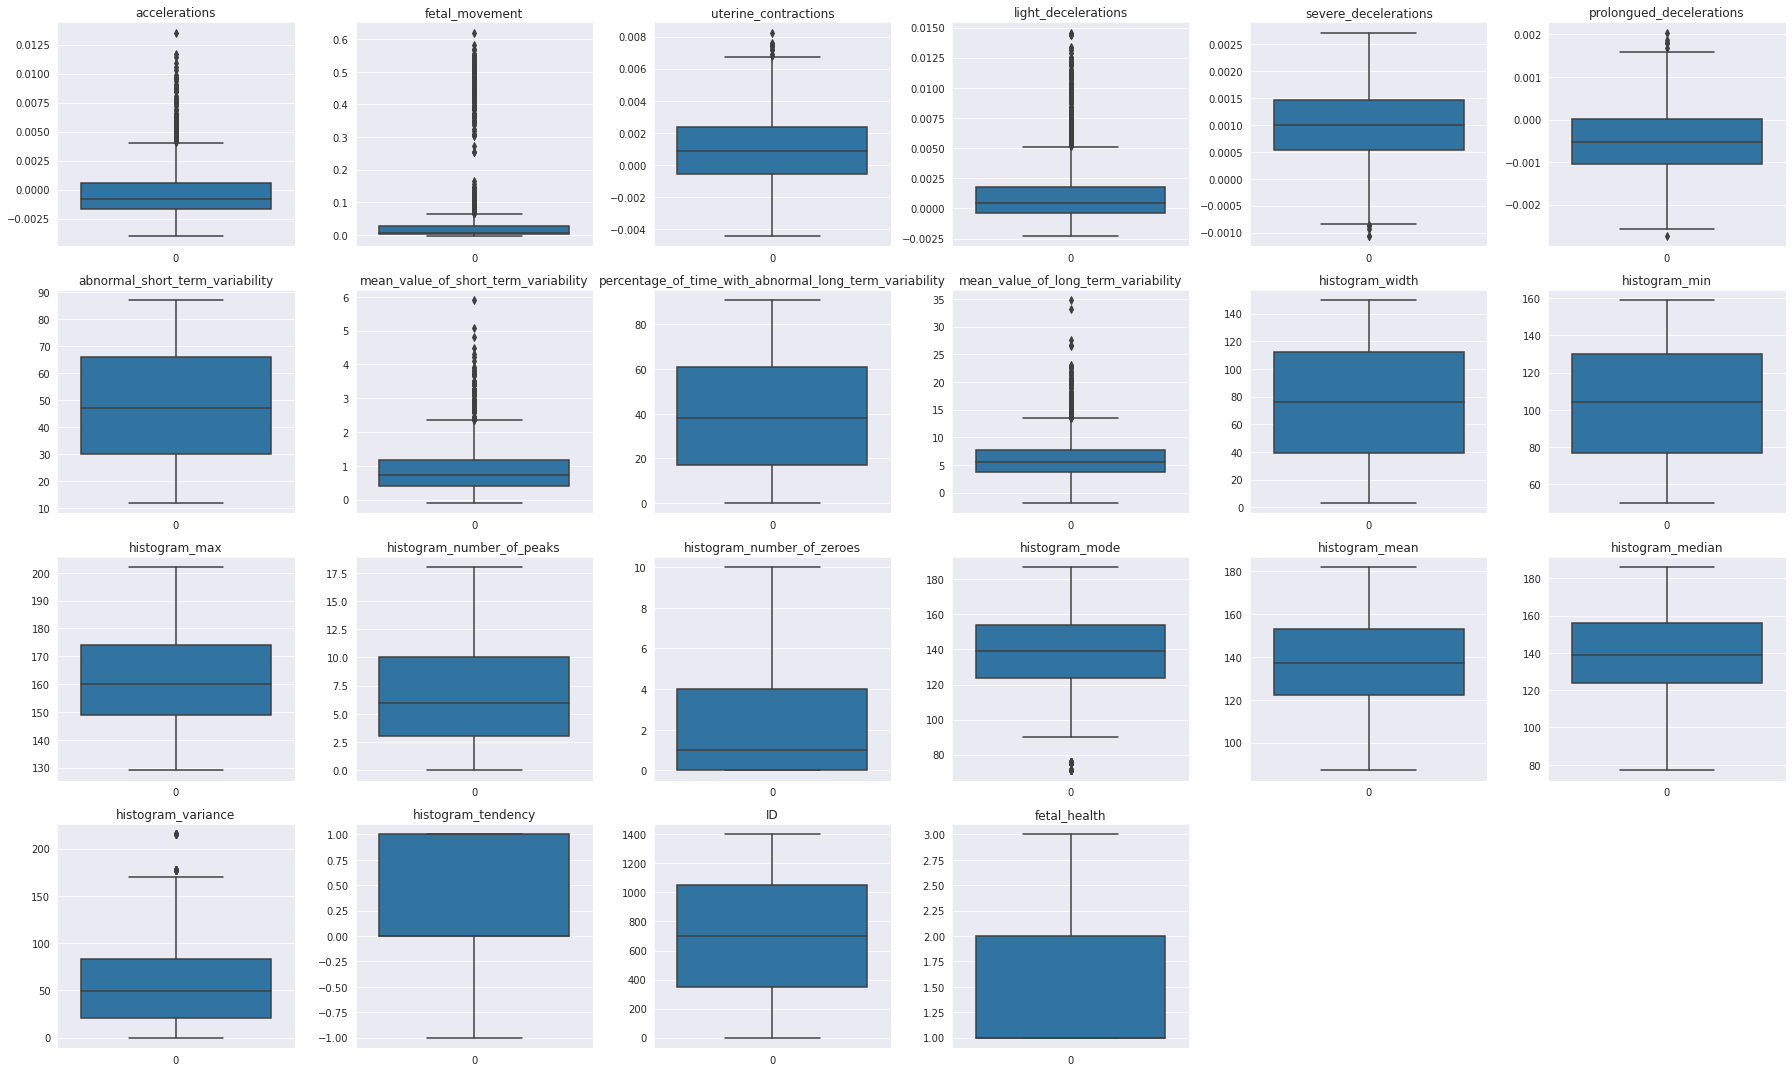

In [8]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=eda_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

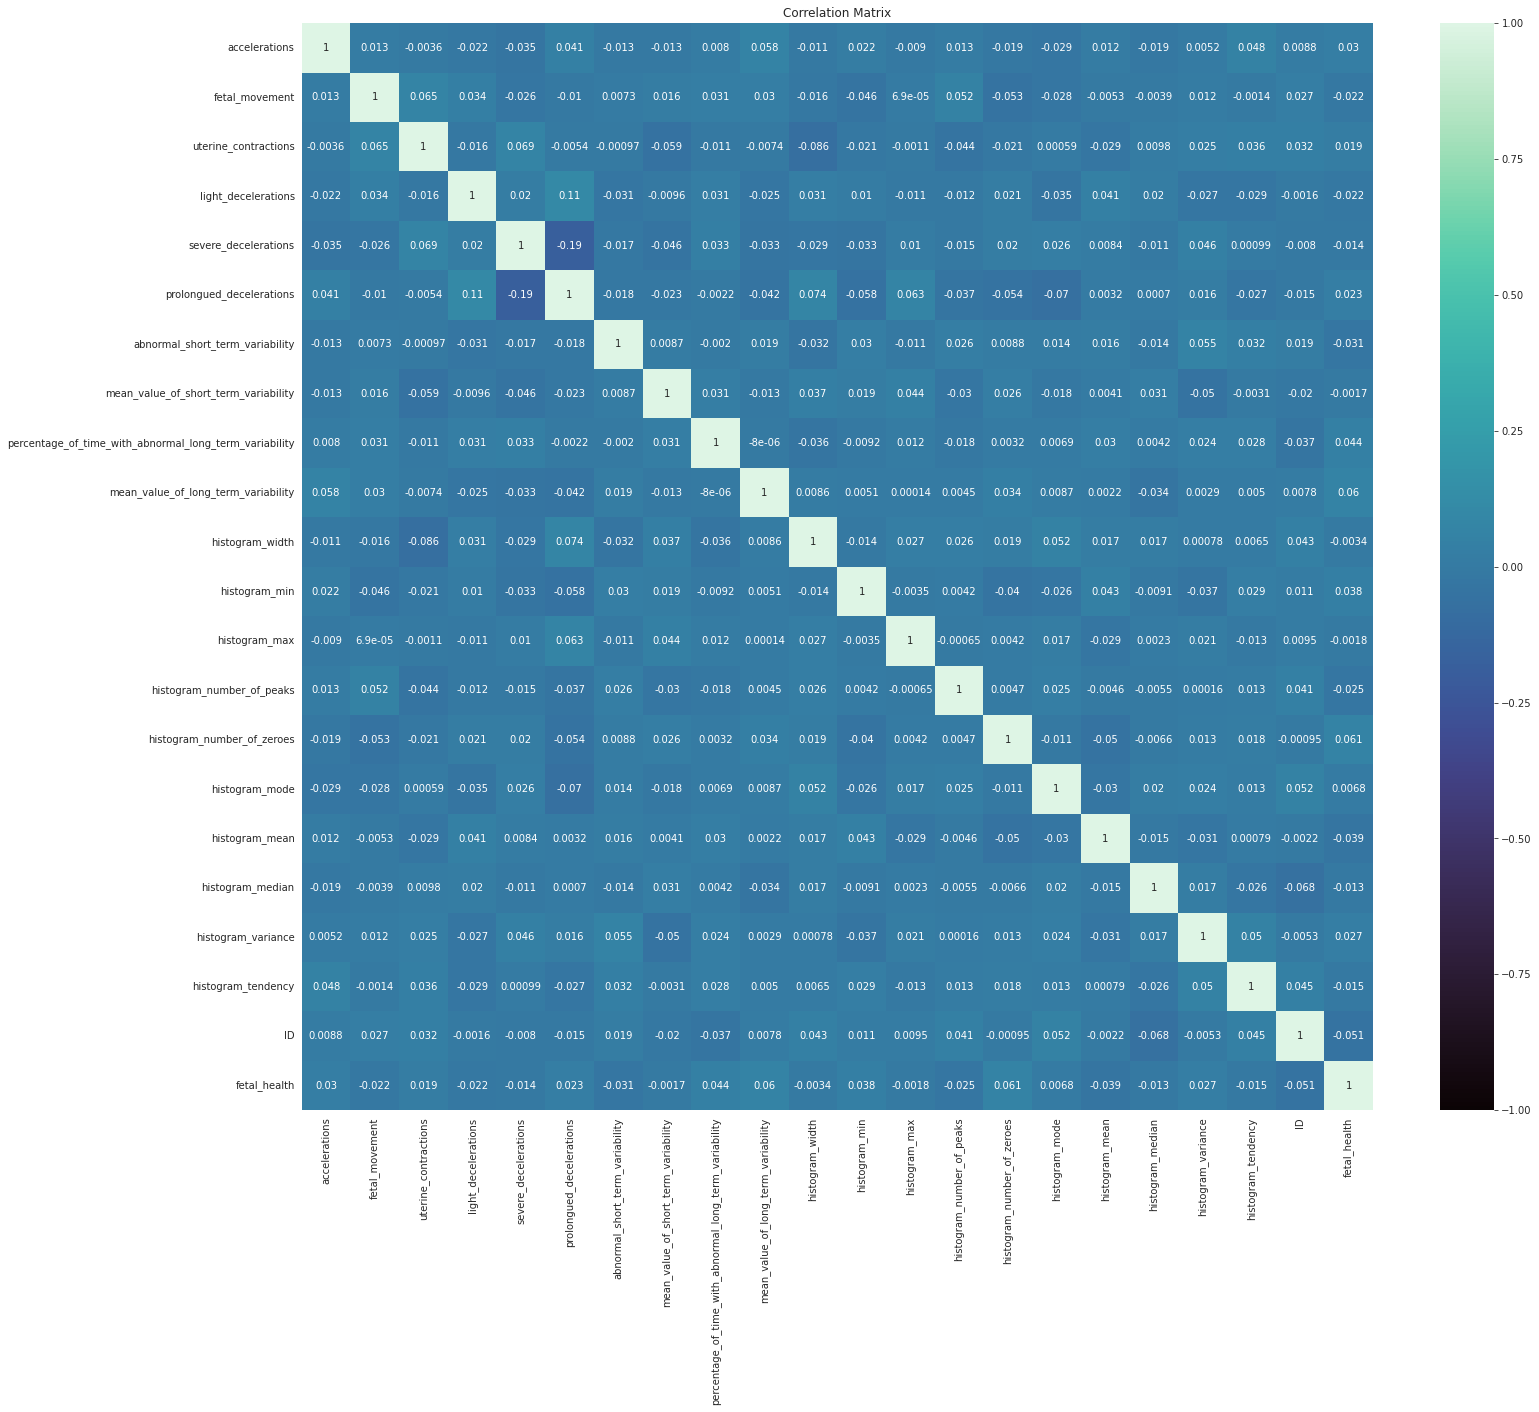

In [9]:
corr = eda_df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Matrix")
plt.show()

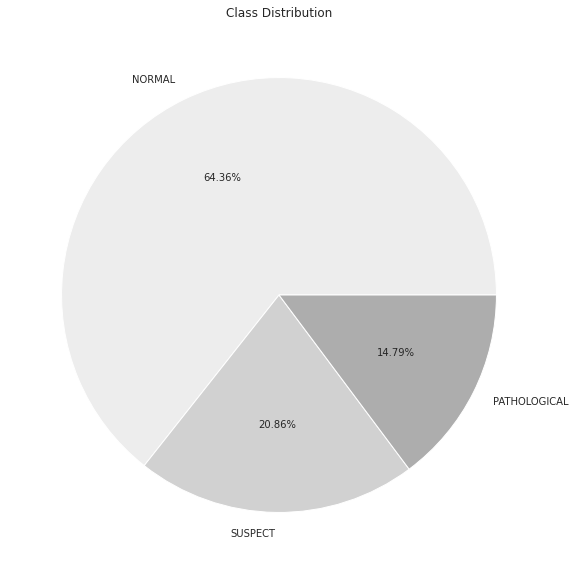

In [10]:
plt.figure(figsize=(10, 10))

plt.pie(
    eda_df['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels=["NORMAL", "SUSPECT", "PATHOLOGICAL"],
    colors=sns.color_palette('Greys')
)

plt.title("Class Distribution")
plt.show()

In [11]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Rename target values
   
    
    # Split df into X and y
    y = df['fetal_health']
    X = df.drop('fetal_health', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [13]:
X_train

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,ID
220,-0.429279,-0.323199,-0.426942,1.632359,0.666112,-0.217830,-0.909624,0.172219,0.517418,-0.082228,-0.129963,0.138974,-0.955039,0.276520,0.093502,0.615708,-0.453633,-0.062438,-1.210328,1.056716,-1.184753
705,-0.328148,-0.243715,0.572389,0.061175,0.109726,-0.284390,1.394017,-0.566045,-0.025469,1.637557,-1.592978,0.802967,1.142352,1.307413,-0.239364,-0.459913,0.852421,-0.062438,2.601522,-0.337523,0.010104
34,-1.342806,-0.407523,-0.740318,-0.616709,-0.690856,0.579330,0.782847,-0.352698,0.284752,0.237403,-0.739552,-1.030918,-1.408529,0.895056,1.424966,-0.632013,0.562187,1.668833,1.820781,-0.337523,-1.642987
85,-0.964192,-0.407237,0.402502,1.083825,-0.733364,1.372387,-0.486506,0.205716,-0.374468,-0.937496,1.601272,-0.493400,1.652529,2.338307,-0.905097,0.744783,0.271953,0.159519,-0.728106,-0.337523,-1.517342
234,0.464165,-0.447216,-0.122493,0.284108,-0.020065,-0.377612,-0.016375,1.251011,0.905194,-1.102668,1.406203,1.530197,-0.444863,1.925950,0.759234,0.013360,-0.308516,1.313700,-0.796995,-0.337523,-1.150262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.549428,-0.440270,1.678138,0.895836,-2.394720,-0.002779,1.394017,-0.489674,-1.421464,-1.108736,1.162367,0.739729,-1.691960,0.070341,-0.905097,1.088982,0.223580,0.647827,-1.141439,-0.337523,0.034740
905,-0.171812,-0.336515,-0.760239,-0.801174,1.107068,-1.927732,-0.909624,-0.558157,0.594973,0.753673,-0.959005,-0.303688,-1.351842,0.276520,-0.572230,0.529658,1.432890,1.313700,-1.256254,-1.731762,0.502828
1096,0.882101,-0.431952,0.165100,-0.741372,-0.191009,-0.602457,-0.110402,2.038482,0.517418,-0.673415,-0.885854,-0.683113,1.822587,-0.754374,-0.905097,0.013360,1.626379,-0.595137,2.096337,1.056716,0.973380
235,0.843949,-0.446749,-0.362130,0.601736,0.958512,1.203779,0.641808,-1.039337,0.207197,-0.305050,0.796613,-1.441962,-0.558235,-1.372910,-0.905097,1.088982,0.417070,1.935182,-1.003662,-0.337523,-1.147799


In [14]:
y_train

220     1
705     3
34      1
85      1
234     1
       ..
715     1
905     1
1096    3
235     1
1061    3
Name: fetal_health, Length: 979, dtype: int64

In [15]:
models = {
  
    "                         Random Forest": RandomForestClassifier(),
   
        }

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
    


                         Random Forest trained.


In [16]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                         Random Forest: 67.46%


In [17]:
features=['accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability',
          'percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width',
          'histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode',
          'histogram_mean','histogram_median','histogram_variance','histogram_tendency','ID']
test_data=pd.read_csv("../input/fetal-health-classification/test.csv")
test_X = test_data[features]
test_preds = model.predict(test_X)

In [18]:
output = pd.DataFrame({'ID': test_data.ID,
                       'fetal_health': test_preds})
output.to_csv('submission.csv', index=False)


In [19]:
_

220     1
705     3
34      1
85      1
234     1
       ..
715     1
905     1
1096    3
235     1
1061    3
Name: fetal_health, Length: 979, dtype: int64